<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [4]:
# 기술통계 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:,target]

**2) 가변수화**

In [6]:
# 가변수화 대상: sex, smoker, region
dumm_cols = ['sex', 'smoker', 'region']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**3) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**4) 정규화**

In [10]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [ ]:
# xgboost 설치
# pip install xgboost

In [ ]:
# lightgbm 설치
# pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [23]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [13]:
# 선언하기
model = LinearRegression()

In [14]:
# 성능예측
# model.fit(x_train_s, y_train)
cv_score = cross_val_score(model, x_train, y_train, cv=5)

In [15]:
# 결과확인
# y_pred = model.predict(x_test_s)
print('평균:', cv_score.mean())

평균: 0.7450313111847257


In [16]:
# 결과수집
result = {}
result['Linear Regression'] = cv_score.mean()

In [18]:
# print(mean_absolute_error(y_test, y_pred))
# print(r2_score(y_test, y_pred))

**2) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [24]:
# 선언하기
model = KNeighborsRegressor()

In [25]:
# 성능예측
# model.fit(x_train_s, y_train)
cv_score = cross_val_score(model, x_train, y_train, cv=5)

In [26]:
# 결과확인
# y_pred = model.predict(x_test_s)
print('평균:', cv_score.mean())

평균: 0.07469284199834947


In [27]:
# 결과수집
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
result = {}
result['KNeighborsRegressor'] = cv_score.mean()

**3) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [28]:
# 선언하기
# model = DecisionTreeClassifier(max_depth=5,  random_state=2022)
model = DecisionTreeClassifier()

In [31]:
# 성능예측
# 검증하기
cv_score = GridSearchCV(model, x_train, y_train, cv=10)

TypeError: __init__() takes 3 positional arguments but 4 positional arguments (and 1 keyword-only argument) were given

In [30]:
# 결과확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[-0.02317383  0.21852172 -0.02102406  0.04389181  0.15524857]
평균: 0.07469284199834947
표준편차: 0.09681351599832734


In [ ]:
# 결과수집


**4) SVM**

- SVM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기
model = SVC(kernel='linear', C=1, random_state=1)

In [ ]:
# 성능예측
model.fit(x_train_s, y_train)

In [ ]:
# 결과확인
y_pred = model.predict(x_test_s)

In [ ]:
# 결과수집
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**5) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기
from sklearn.ensemble import RandomForest
model = RandomForest()

In [ ]:
# 성능예측
model.fit(x_train,y_train)

In [ ]:
# 결과확인
y_pred = model.predict(x_test)

In [ ]:
# 결과수집
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5, 5))
plt.barh(list(x), model.feature_importances_)
plt.show()

**6) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기
model = XGBClassifier(max_depth=5, random_state=1)

In [ ]:
# 성능예측
model.fit(x_train, y_train)

In [ ]:
# 결과확인
y_pred = model.predict(x_test)

In [ ]:
# 결과수집
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**7) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [ ]:
# 선언하기
model = LGBMClassifier(max_depth=5, random_state=1)

In [ ]:
# 성능예측
model.fit(x_train, y_train)

In [ ]:
# 결과확인
y_pred = model.predict(x_test)

In [ ]:
# 결과수집
print(classification_report(y_test, y_pred))

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [32]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [33]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

KNeighborsRegressor 0.075


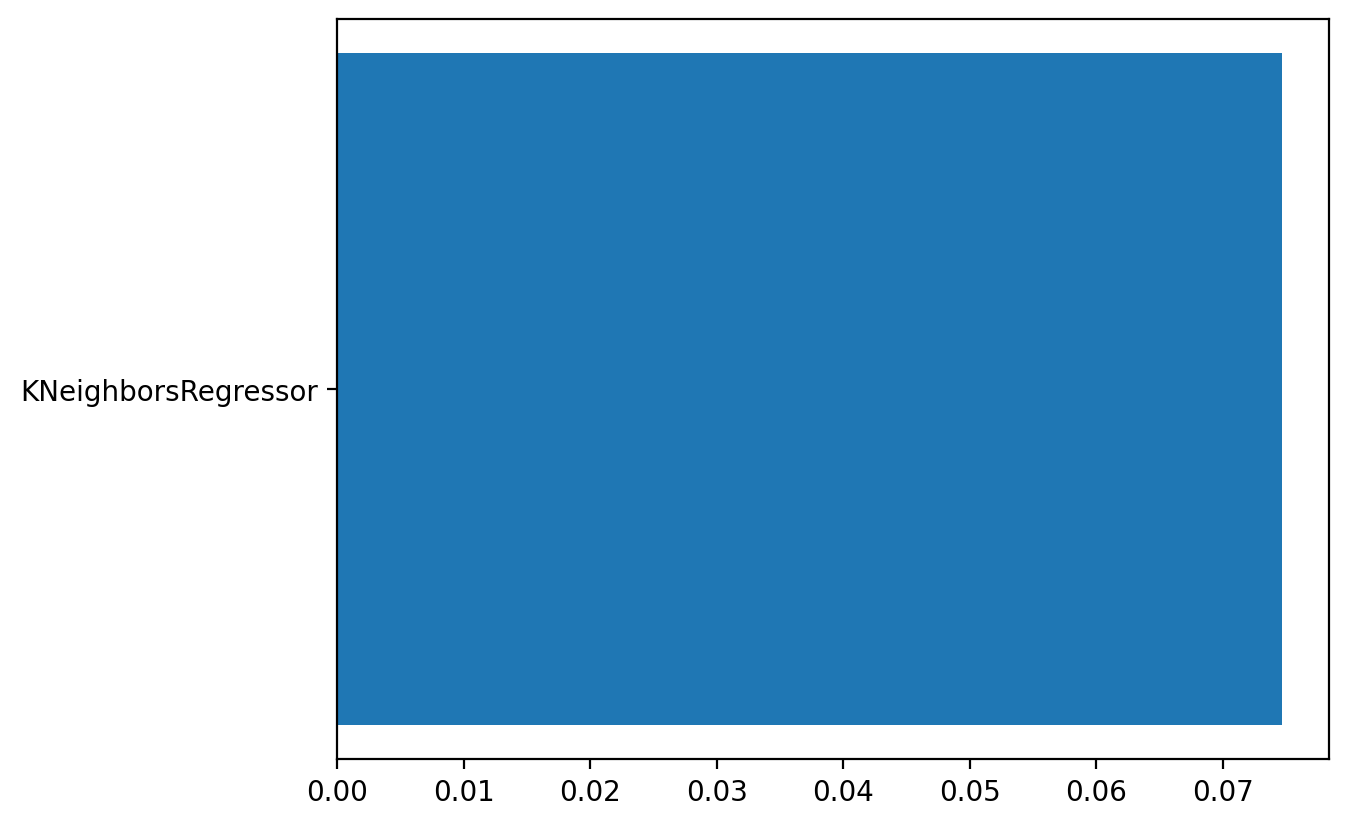

In [34]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

In [36]:
# 기본 모델 선언
from sklearn.model_selection import RandomizedSearchCV

# 파라미터 지정
  # max_depth: range(1, 21)
param = {'max_depth': range(1, 21)}

# 모델 선언
model = RandomizedSearchCV(model, # 기본 모델
                          param, # 파라미터 범위
                           cv = 5, # k-Fold CV의 폴더 개수
                           n_iter=20, # 랜덤하게 시도할 횟수
                           scoring='r2' # 사용할 명가지표
                          )

In [37]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 224, in fit
    check_classification_targets(y)
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\multiclass.py", line 207, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


In [38]:
# 최적 파라미터, 예측 최고 성능
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [39]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model.best_estimator_,                 # 모델 이름
                out_file='tree.dot',                   # 파일 이름 
                feature_names=x.columns,               # Feature 이름
                class_names=['die', 'survived'],       # Target Class 이름
                rounded=True,                          # 둥근 테두리
                precision=2,                           # 불순도 소숫점 자리수
                max_depth=3,                           # 어디까지 보여줄지 지정
                filled=True)                           # 박스 내부 채우기

# 파일 변환
!dot tree.dot -Tpng -otree.png -Gdpi=300

# 이미지 파일 표시
Image(filename='tree.png')

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

<Figure size 500x500 with 0 Axes>

# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [40]:
# 예측하기
y_pred = model.predict(x_test)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [41]:
# 성능평가
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

NameError: name 'y_pred' is not defined